# Network Node Distribution

In [22]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
import powerlaw
from scipy.stats import norm
import matplotlib.pyplot as plt
print(ad.__version__)

0.11.4


In [23]:
# There are 9 excel files in the folder results
# The excel files have two collumns: 'Gene' and 'Number of Significant Differences'

# The excel files are named: "results/{}_significant_differences.xlsx".format(cell_type)
cell_types = [
    # "CD8-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta memory T cell",
    "CD4-positive, alpha-beta T cell",
    "central memory CD4-positive, alpha-beta T cell",
    "effector memory CD4-positive, alpha-beta T cell",
    "gamma-delta T cell",
    "regulatory T cell",
    # "double negative T regulatory cell",
    # "innate lymphoid cell"
]

# Load all the excel files into separate dictionaries
excel_files_networks = {}

for cell_type in cell_types:
    file_path = f"results/network/young_old/{cell_type}_gene_associations.xlsx"
    excel_files_networks[cell_type] = pd.read_excel(file_path)
    

In [24]:
import ast

for cell_type, df in excel_files_networks.items():
    print(f"Cell Type: {cell_type}")
    
    # Convert string representation of list to actual list
    df['Associated Genes'] = df['Associated Genes'].apply(ast.literal_eval)
    df['Number of Associated Genes'] = df['Associated Genes'].apply(len)
    
    # Now you can access the first gene list properly
    first_gene = df.iloc[0]['Gene']
    first_element = df.iloc[0]['Associated Genes']  # Now a list, not a string
    first_element_first = first_element[0]
    first_num = df.iloc[0]['Number of Associated Genes']
    print(f"First Gene: {first_gene}, {type(first_gene)}")
    print(f"First Associated Gene: {first_element_first}, {type(first_element_first)}")
    print(f"Number of Associated Genes: {first_num}, {type(first_num)}")
    
    
    print(f"First Gene: {first_gene}, {type(first_gene)}")
    print(f"First Associated Gene: {first_element}, {type(first_element)}")
    print("\n")

Cell Type: CD8-positive, alpha-beta memory T cell
First Gene: ENSG00000241343, <class 'str'>
First Associated Gene: ENSG00000110958, <class 'str'>
Number of Associated Genes: 153, <class 'numpy.int64'>
First Gene: ENSG00000241343, <class 'str'>
First Associated Gene: ['ENSG00000110958', 'ENSG00000231925', 'ENSG00000213719', 'ENSG00000213654', 'ENSG00000152601', 'ENSG00000109332', 'ENSG00000162434', 'ENSG00000180096', 'ENSG00000143924', 'ENSG00000115053', 'ENSG00000219200', 'ENSG00000101608', 'ENSG00000133574', 'ENSG00000089009', 'ENSG00000100911', 'ENSG00000115524', 'ENSG00000135390', 'ENSG00000089157', 'ENSG00000228474', 'ENSG00000247774', 'ENSG00000109062', 'ENSG00000240065', 'ENSG00000196329', 'ENSG00000005483', 'ENSG00000198888', 'ENSG00000162894', 'ENSG00000184076', 'ENSG00000196924', 'ENSG00000009790', 'ENSG00000178982', 'ENSG00000044574', 'ENSG00000187239', 'ENSG00000078304', 'ENSG00000140264', 'ENSG00000125743', 'ENSG00000123349', 'ENSG00000115268', 'ENSG00000188243', 'ENSG0000

In [25]:
# For each cell type, print the head of the dataframe
for cell_type, df in excel_files_networks.items():
    print(f"Cell Type: {cell_type}")
    print(df.head())
    print("\n")

Cell Type: CD8-positive, alpha-beta memory T cell
              Gene                                   Associated Genes  \
0  ENSG00000241343  [ENSG00000110958, ENSG00000231925, ENSG0000021...   
1  ENSG00000177954  [ENSG00000134333, ENSG00000153234, ENSG0000023...   
2  ENSG00000124614  [ENSG00000153234, ENSG00000170345, ENSG0000011...   
3  ENSG00000151883  [ENSG00000188042, ENSG00000153234, ENSG0000021...   
4  ENSG00000087074  [ENSG00000134333, ENSG00000213719, ENSG0000021...   

   Number of Associated Genes  
0                         153  
1                         129  
2                         122  
3                         119  
4                         118  


Cell Type: CD4-positive, alpha-beta T cell
              Gene                                   Associated Genes  \
0  ENSG00000160888  [ENSG00000187109, ENSG00000172757, ENSG0000017...   
1  ENSG00000228253  [ENSG00000153234, ENSG00000170345, ENSG0000021...   
2  ENSG00000099860  [ENSG00000152601, ENSG00000143924, 

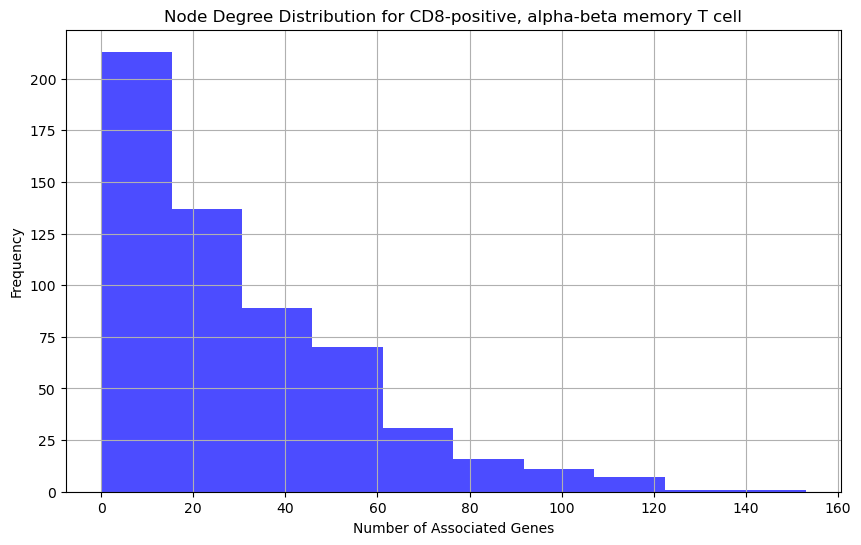

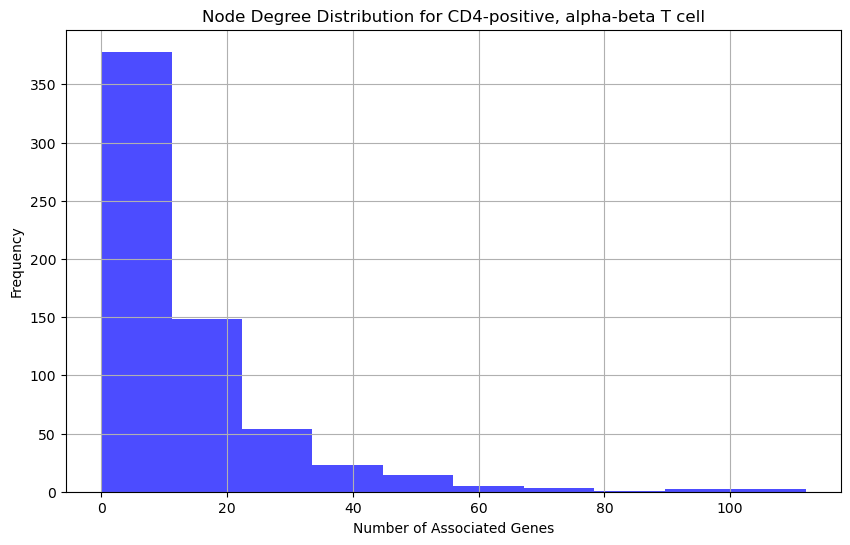

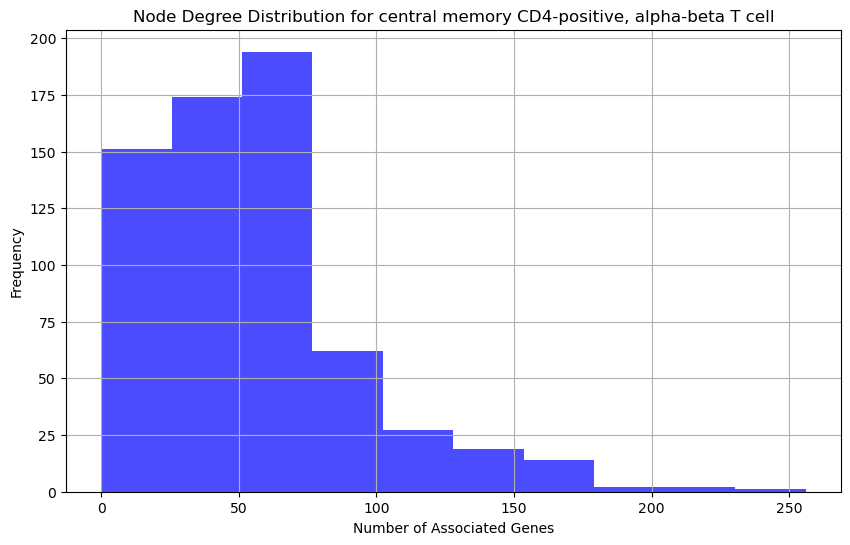

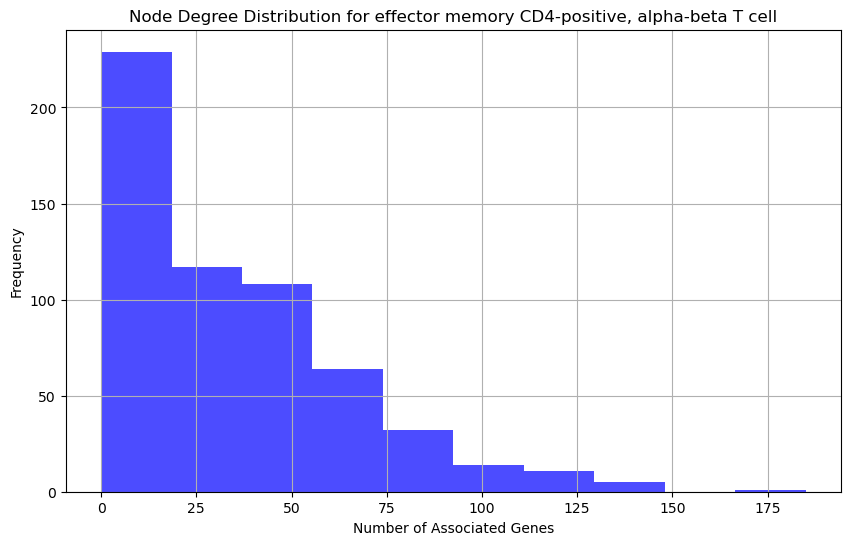

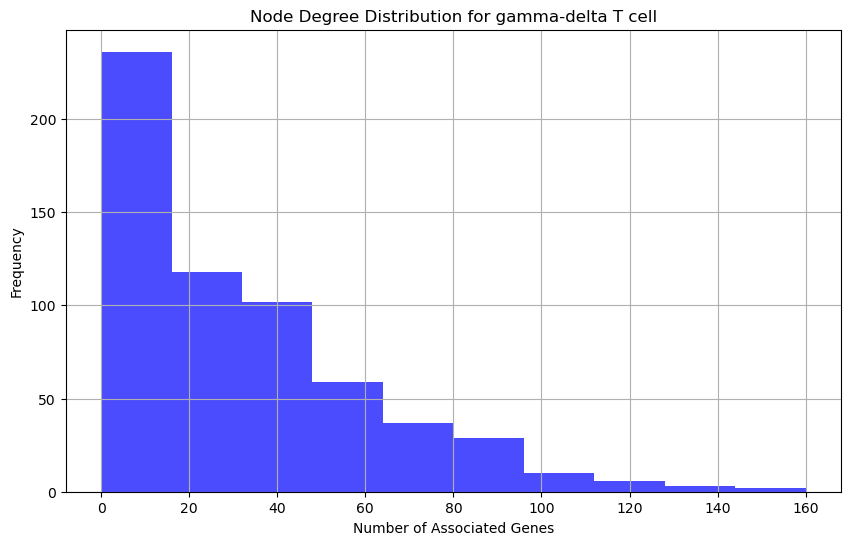

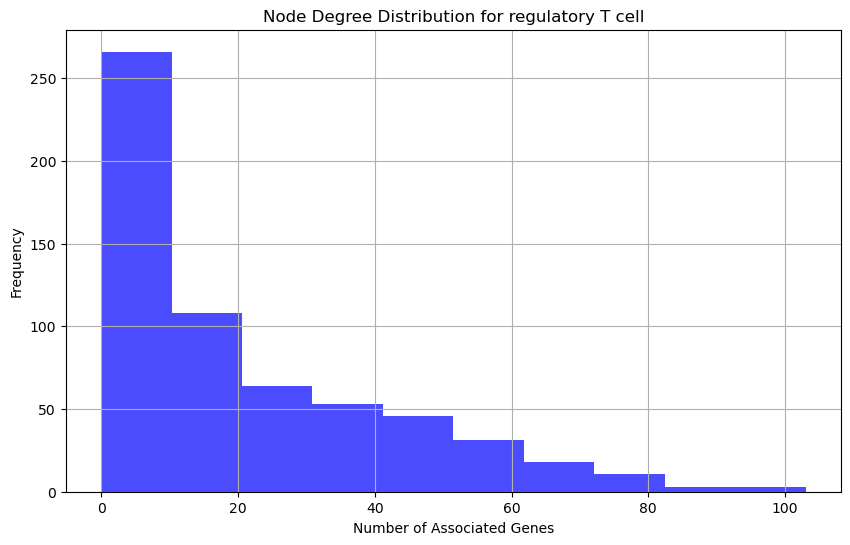

In [26]:
import matplotlib.pyplot as plt

# Now do it for all the cell types
for cell_type, df in excel_files_networks.items():
    # Plot the node degree distribution for each cell type
    plt.figure(figsize=(10, 6))
    plt.hist(df['Number of Associated Genes'], bins=10, color='blue', alpha=0.7)
    plt.title(f'Node Degree Distribution for {cell_type}')
    plt.xlabel('Number of Associated Genes')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [27]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# for cell_type, df in excel_files_networks.items():
#     # Calculate degree counts
#     degrees = df['Number of Associated Genes']
#     other_degrees = df['Number of Associated Genes'].value_counts().sort_index()
    
#     hist, bin_edges = np.histogram(degrees, bins=10)

#     # Plot the histogram as a scatter plot in log-log scale
#     plt.figure(figsize=(10, 6))
#     plt.scatter(bin_edges[:-1], hist, color='blue', alpha=0.7, label='Degree Counts')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.title(f'Node Degree Distribution for {cell_type}')
#     plt.xlabel('Number of Associated Genes (log scale)')
#     plt.ylabel('Frequency (log scale)')
#     plt.grid(True)
#     plt.legend()
#     plt.show()

    

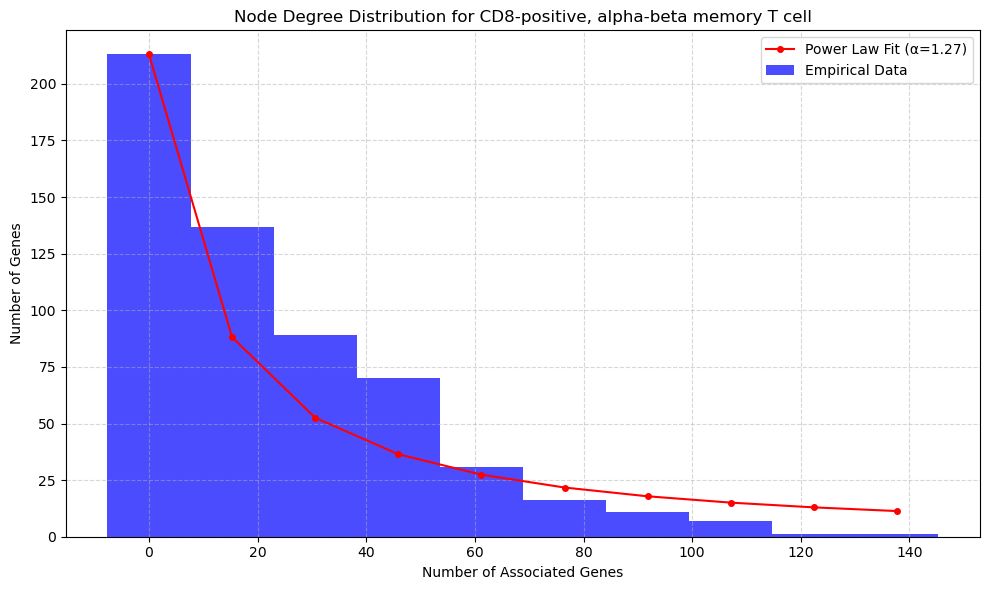

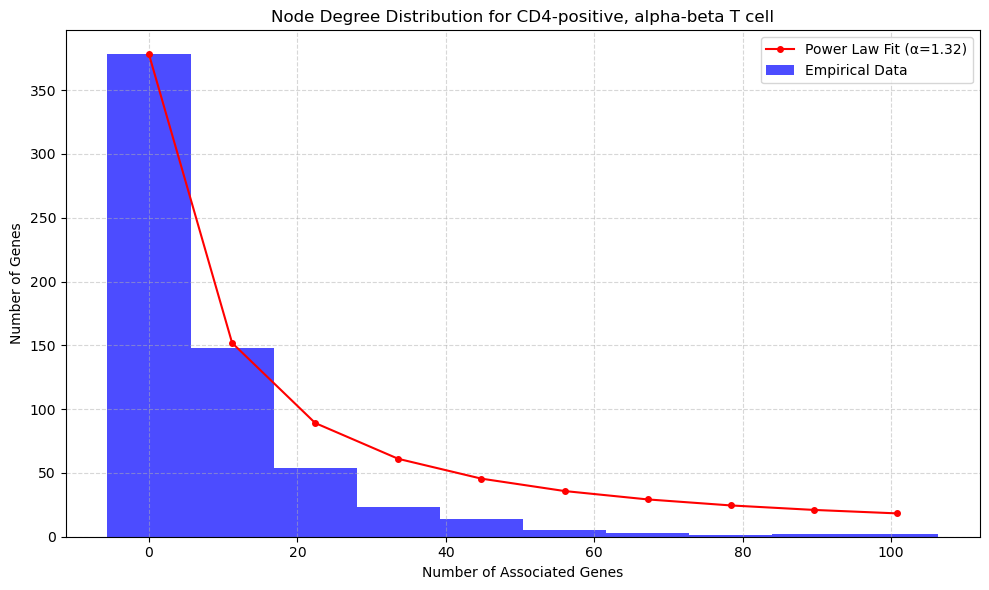

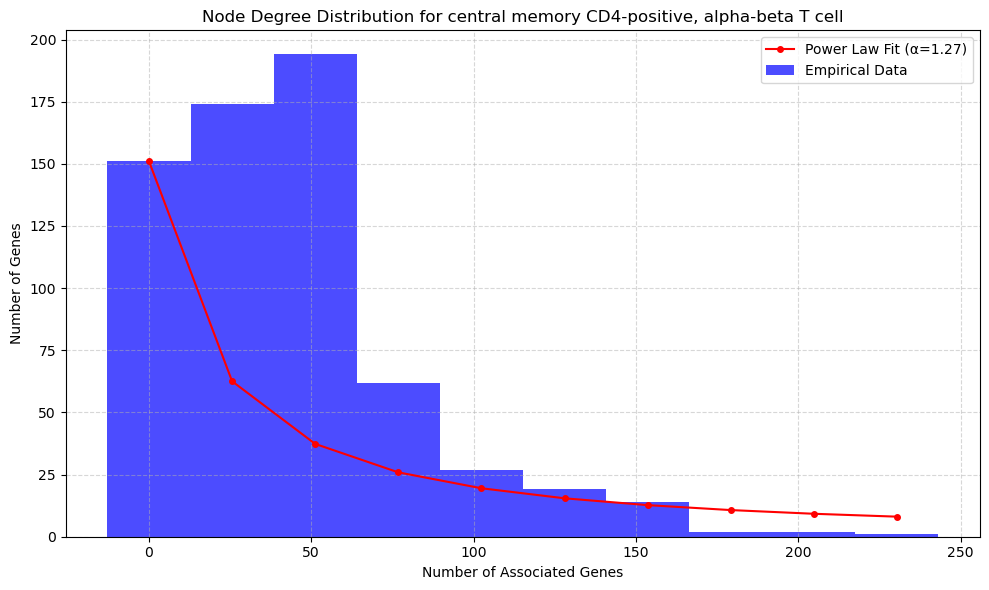

Values less than or equal to 0 in data. Throwing out 0 or negative values


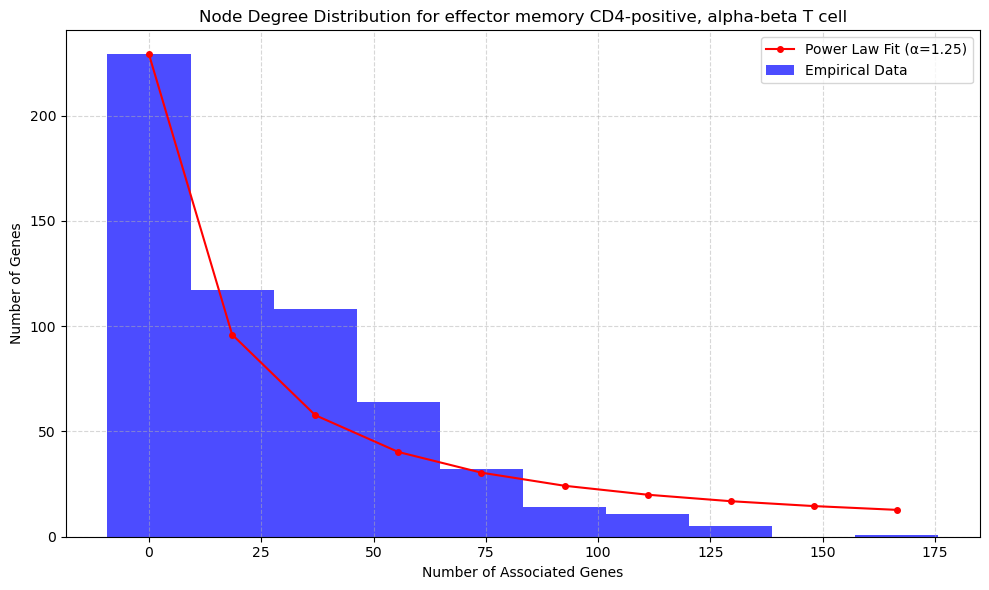

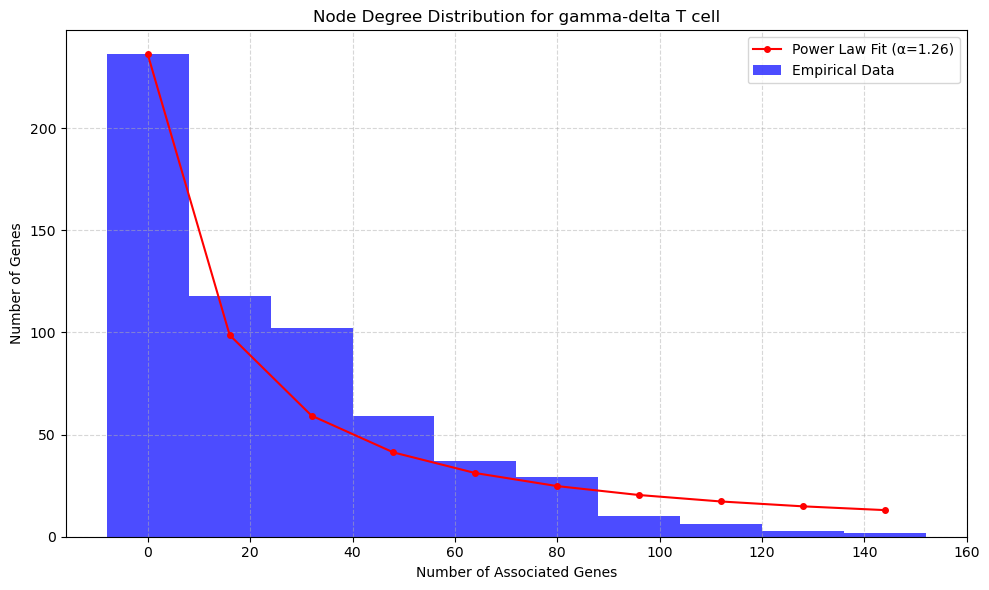

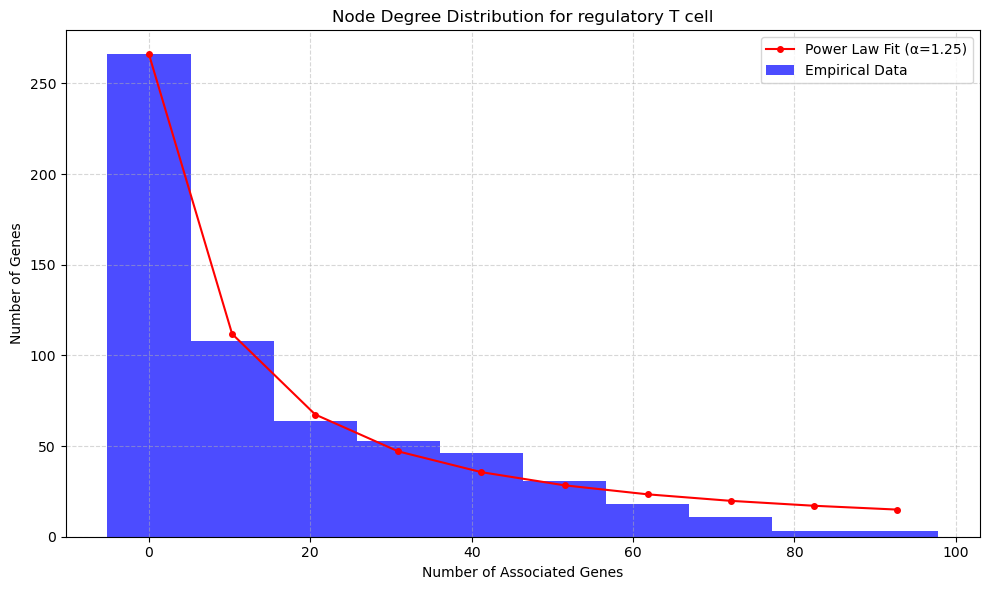

In [28]:
for cell_type, df in excel_files_networks.items():
    # Get degree counts (including zeros)
    degrees = df['Number of Associated Genes'].values

    # Make a new object for the histogram
    # This will have 30 bins
    hist, bin_edges = np.histogram(degrees, bins=10)

    # print(hist)
    # print(bin_edges[:-1])  # Print the bin edges except the last one

    # Fit power law to the histogram data
    fit = powerlaw.Fit(hist, discrete=True, xmin=1)

    # Plot the histogram and the power law fit
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color='blue', alpha=0.7, label='Empirical Data')
    x = np.arange(1, len(hist) + 1)
    y = ((x)**-fit.power_law.alpha) * (hist[0]/1**-fit.power_law.alpha)  # Scale to match first bin
    plt.plot(bin_edges[:-1], y, 'ro-', markersize=4, linewidth=1.5, label=f'Power Law Fit (α={fit.power_law.alpha:.2f})')
    plt.title(f'Node Degree Distribution for {cell_type}')
    plt.xlabel('Number of Associated Genes')
    plt.ylabel('Number of Genes')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    

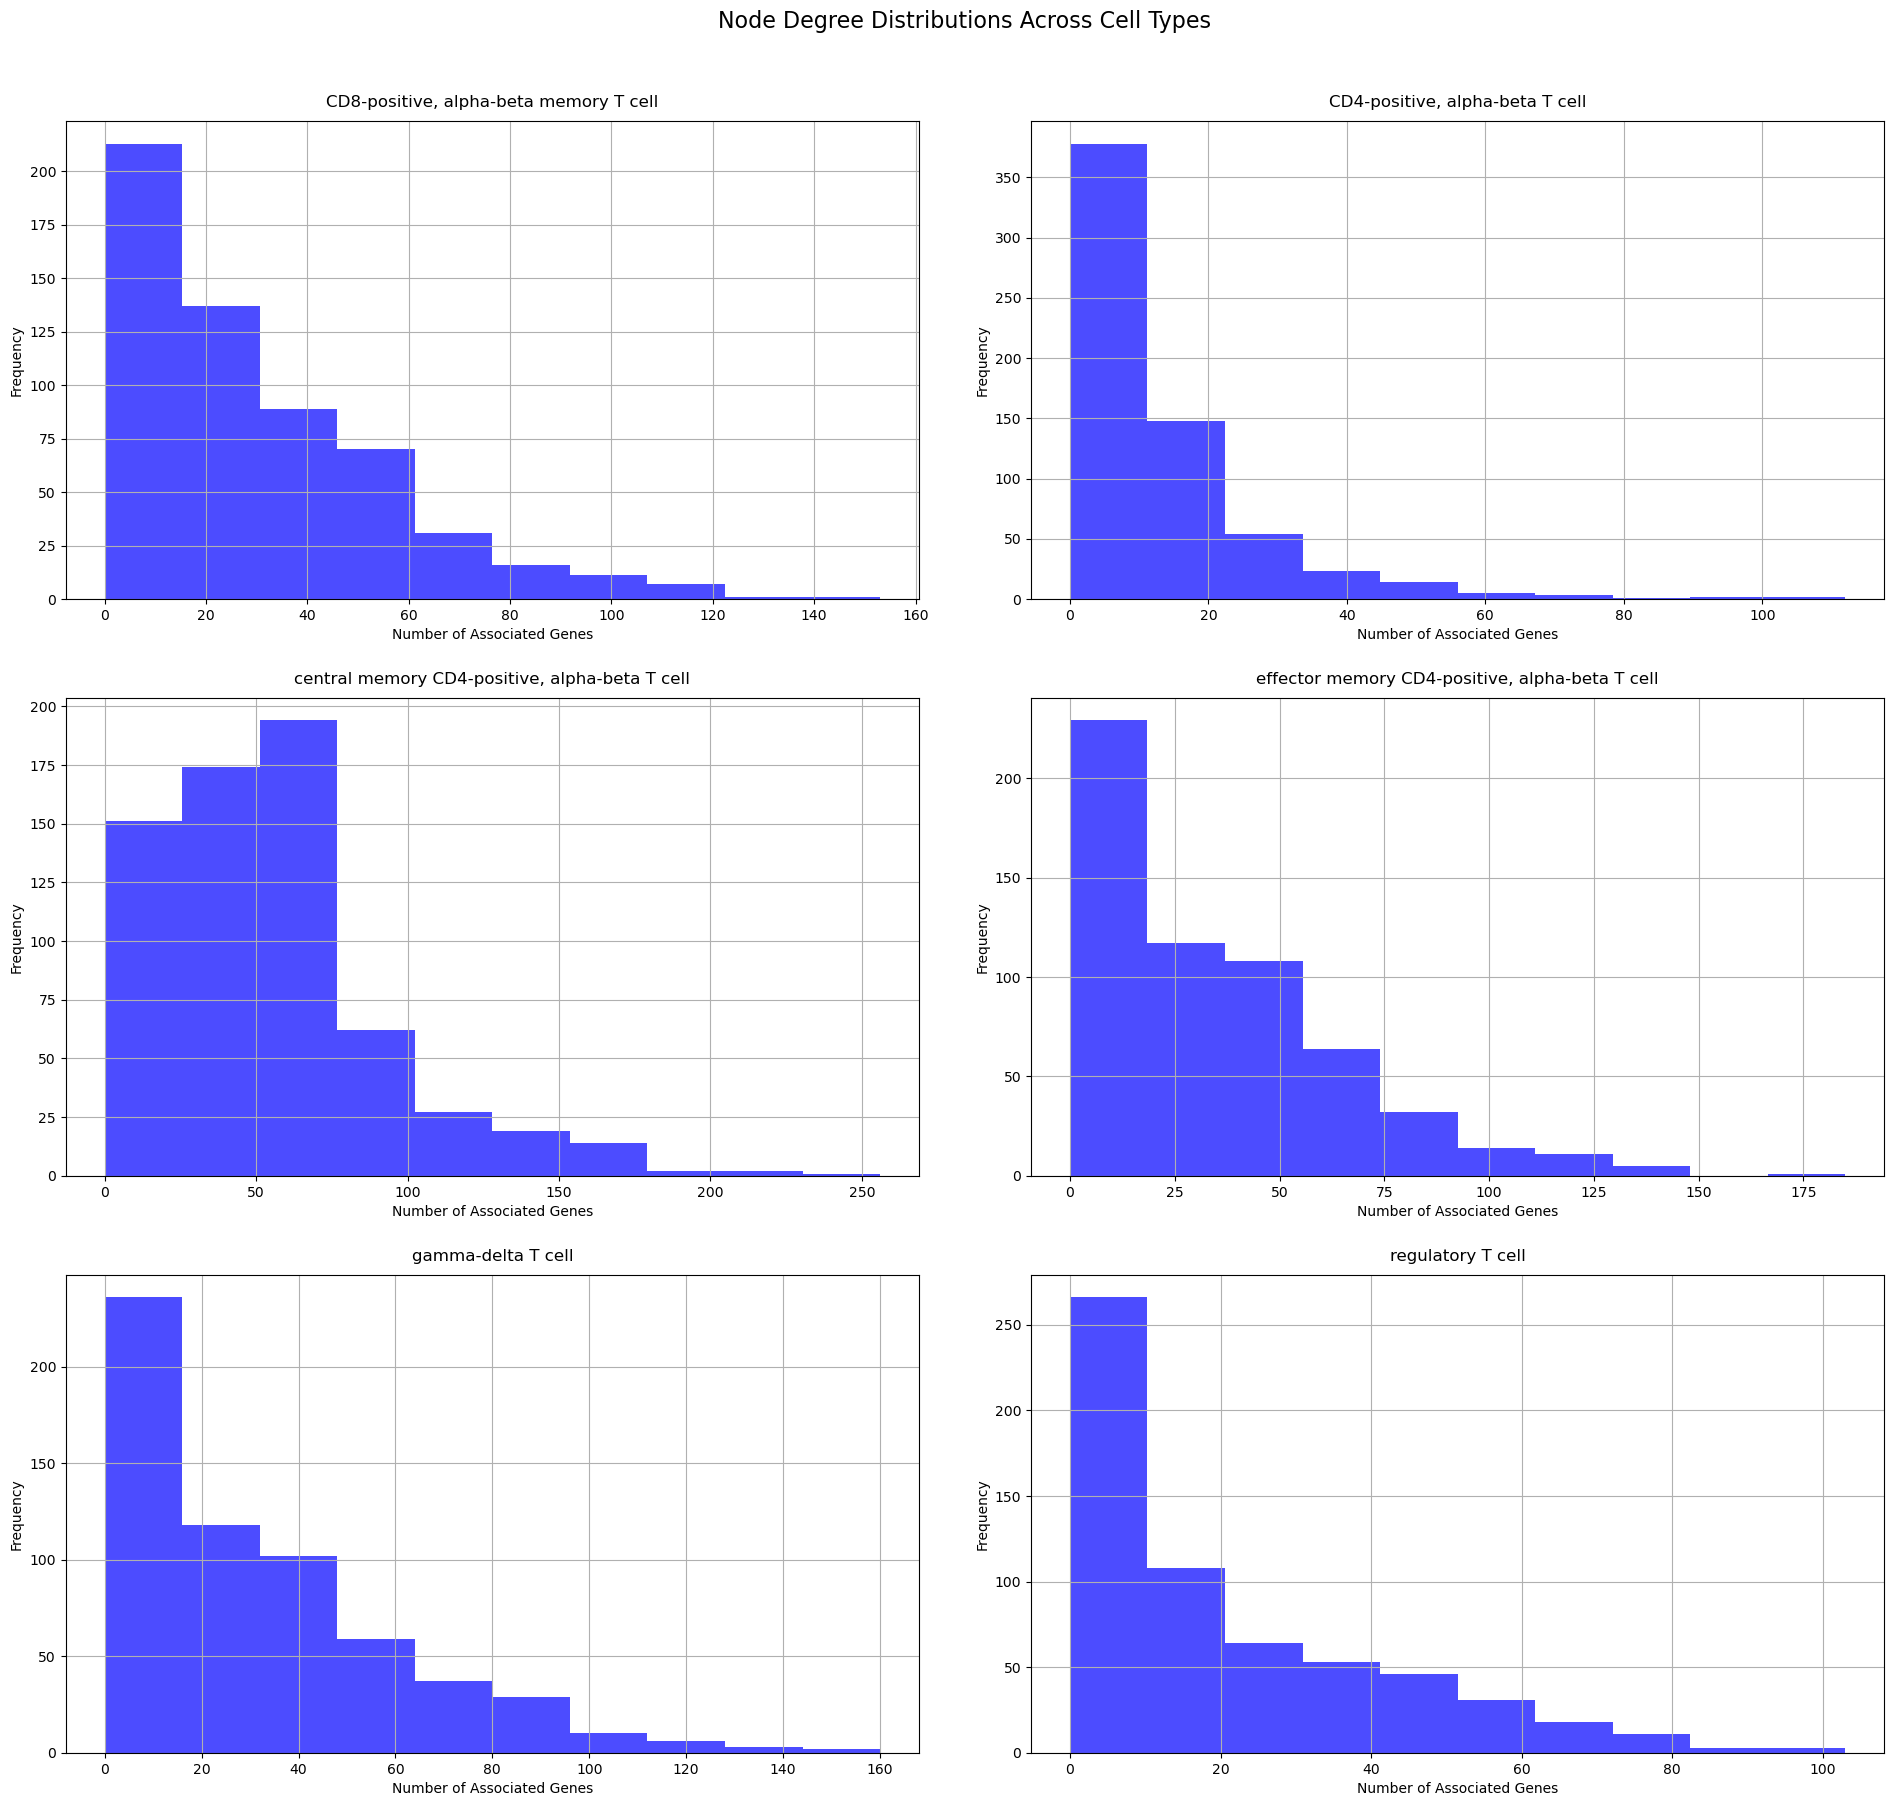

In [29]:
import matplotlib.pyplot as plt
import math

# Create a figure with subplots
n_cols = 2 # Number of columns in the subplot grid
n_cell_types = len(excel_files_networks)
n_rows = math.ceil(n_cell_types / n_cols)  # Calculate needed rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.tight_layout(pad=5.0)  # Add padding between subplots

# Flatten axes array for easy iteration
axes = axes.flatten()

# Now do it for all the cell types
for i, (cell_type, df) in enumerate(excel_files_networks.items()):
    # Count the number of association genes for each gene
    temp_df = df['Associated Genes'].apply(lambda x: len(x))
    
    # Create the dataframe for plotting
    df_new = df.drop(columns=['Associated Genes']).copy()
    df_new['Number of Associated Genes'] = temp_df
    df_new.columns = ['Gene', 'Number of Associated Genes']
    
    # Plot on the appropriate subplot
    ax = axes[i]
    ax.hist(df_new['Number of Associated Genes'], bins=10, color='blue', alpha=0.7)
    ax.set_title(f'{cell_type}', pad=10)
    ax.set_xlabel('Number of Associated Genes')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Add a main title for the entire figure
fig.suptitle('Node Degree Distributions Across Cell Types', fontsize=16, y=1.02)

# Save and show
plt.savefig('results/network/young_old/all_cell_types_node_degree_distributions.png', 
            bbox_inches='tight', dpi=300)
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


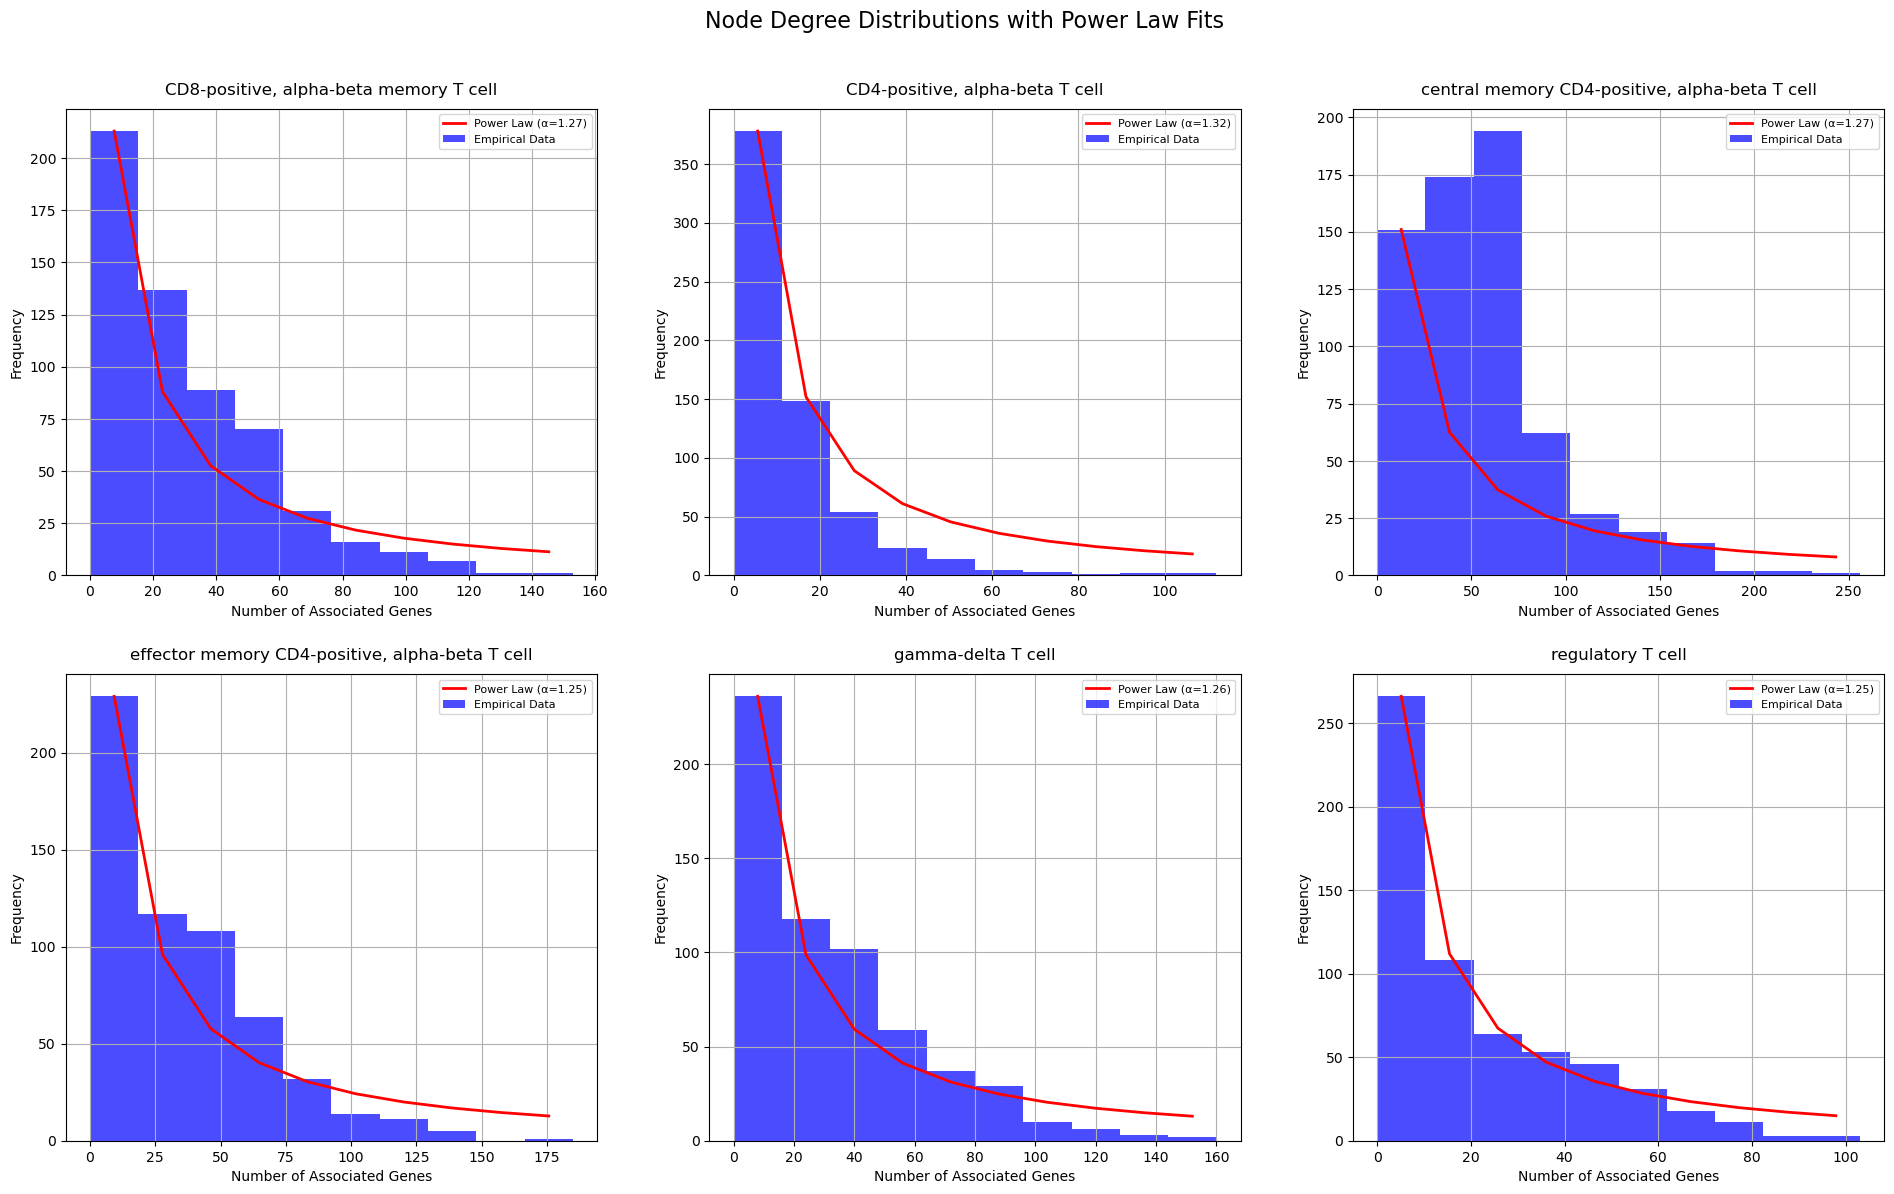

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
import powerlaw

# Create figure with subplots
n_cols = 3
n_cell_types = len(excel_files_networks)
n_rows = math.ceil(n_cell_types / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

# Process each cell type
for i, (cell_type, df) in enumerate(excel_files_networks.items()):
    # Get degree counts
    degrees = df['Number of Associated Genes'].values
    
    # Create histogram with 10 bins
    hist, bin_edges = np.histogram(degrees, bins=10)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    
    # Fit power law
    fit = powerlaw.Fit(hist, discrete=True, xmin=1)
    x = np.arange(1, len(hist) + 1)
    y = ((x)**-fit.power_law.alpha) * (hist[0]/1**-fit.power_law.alpha)  # Scale to match first bin
    
    # Plot on subplot
    ax = axes[i]
    ax.bar(bin_centers, hist, width=np.diff(bin_edges), 
           color='blue', alpha=0.7, label='Empirical Data')
    
    ax.plot(bin_centers, y, 'r-', linewidth=2, label=f'Power Law (α={fit.power_law.alpha:.2f})')
    
    ax.set_title(f'{cell_type}', pad=10)
    ax.set_xlabel('Number of Associated Genes')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=8)
    ax.grid(True)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Node Degree Distributions with Power Law Fits',  fontsize=16, y=1.02)
plt.savefig('results/network/young_old/all_cell_types_powerlaw_fits.png', bbox_inches='tight', dpi=300)
plt.show()


Cell Type: CD8-positive, alpha-beta memory T cell
Number of nodes: 576
Number of edges: 8630


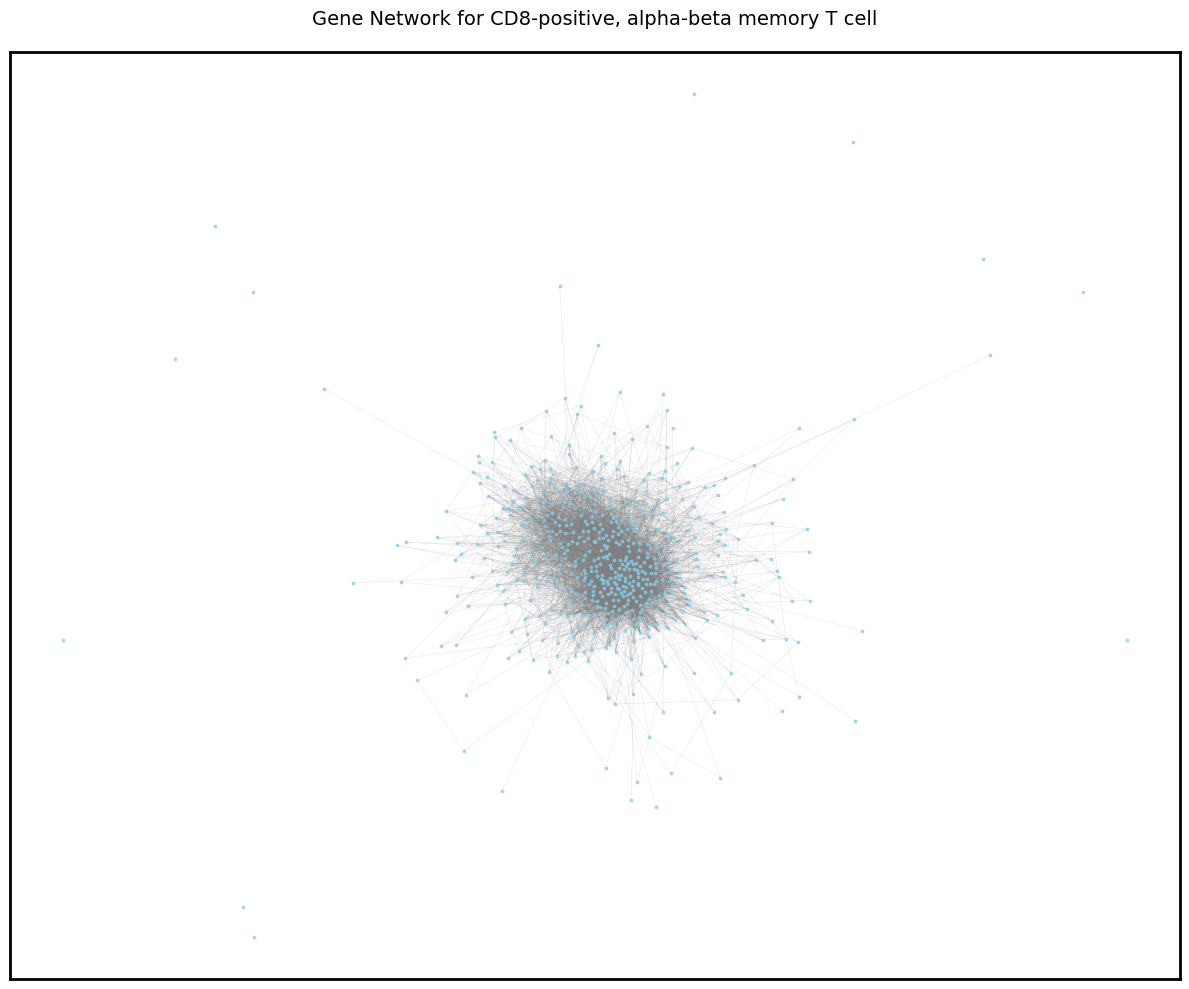


Cell Type: CD4-positive, alpha-beta T cell
Number of nodes: 630
Number of edges: 4080


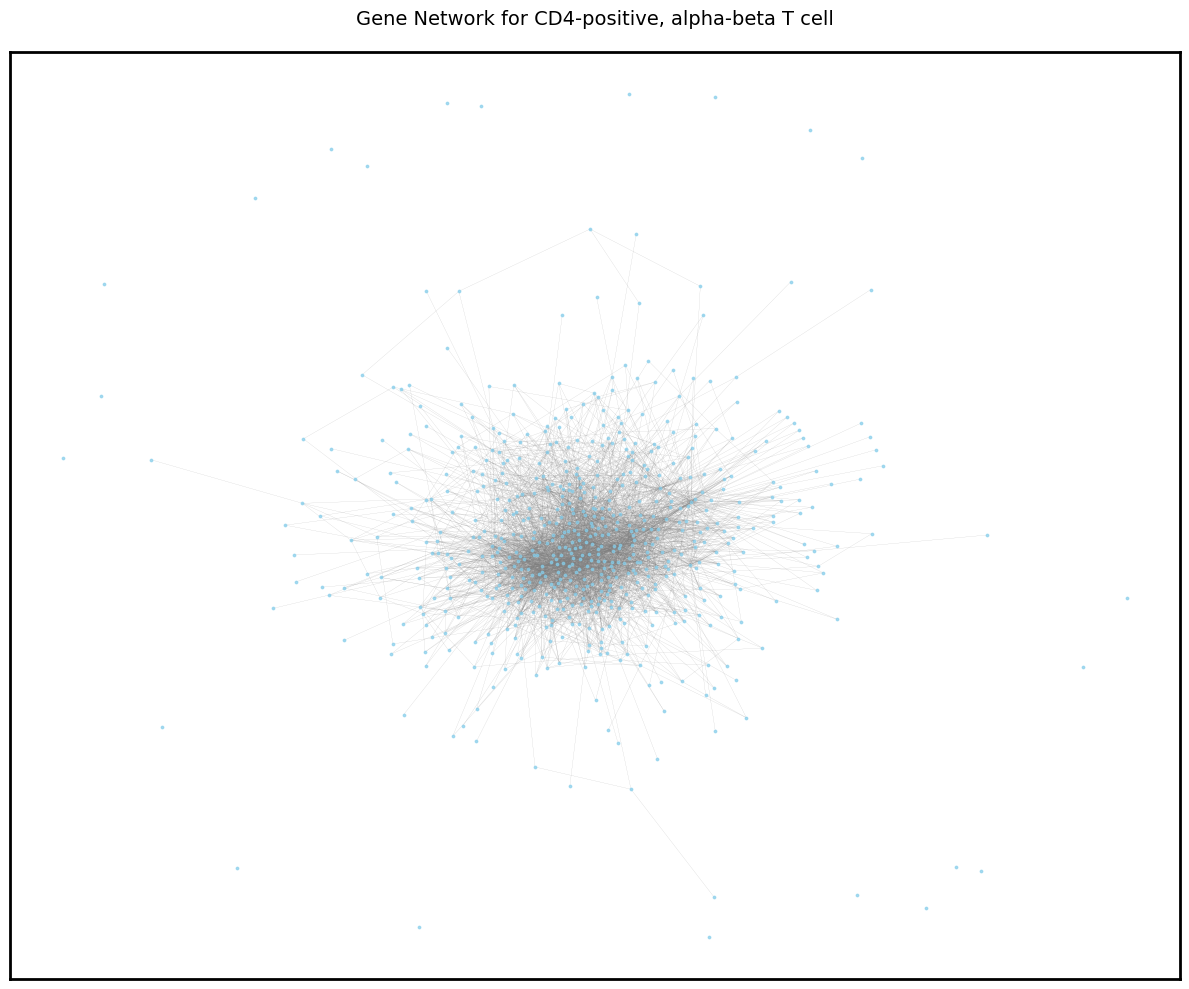


Cell Type: central memory CD4-positive, alpha-beta T cell
Number of nodes: 646
Number of edges: 17425


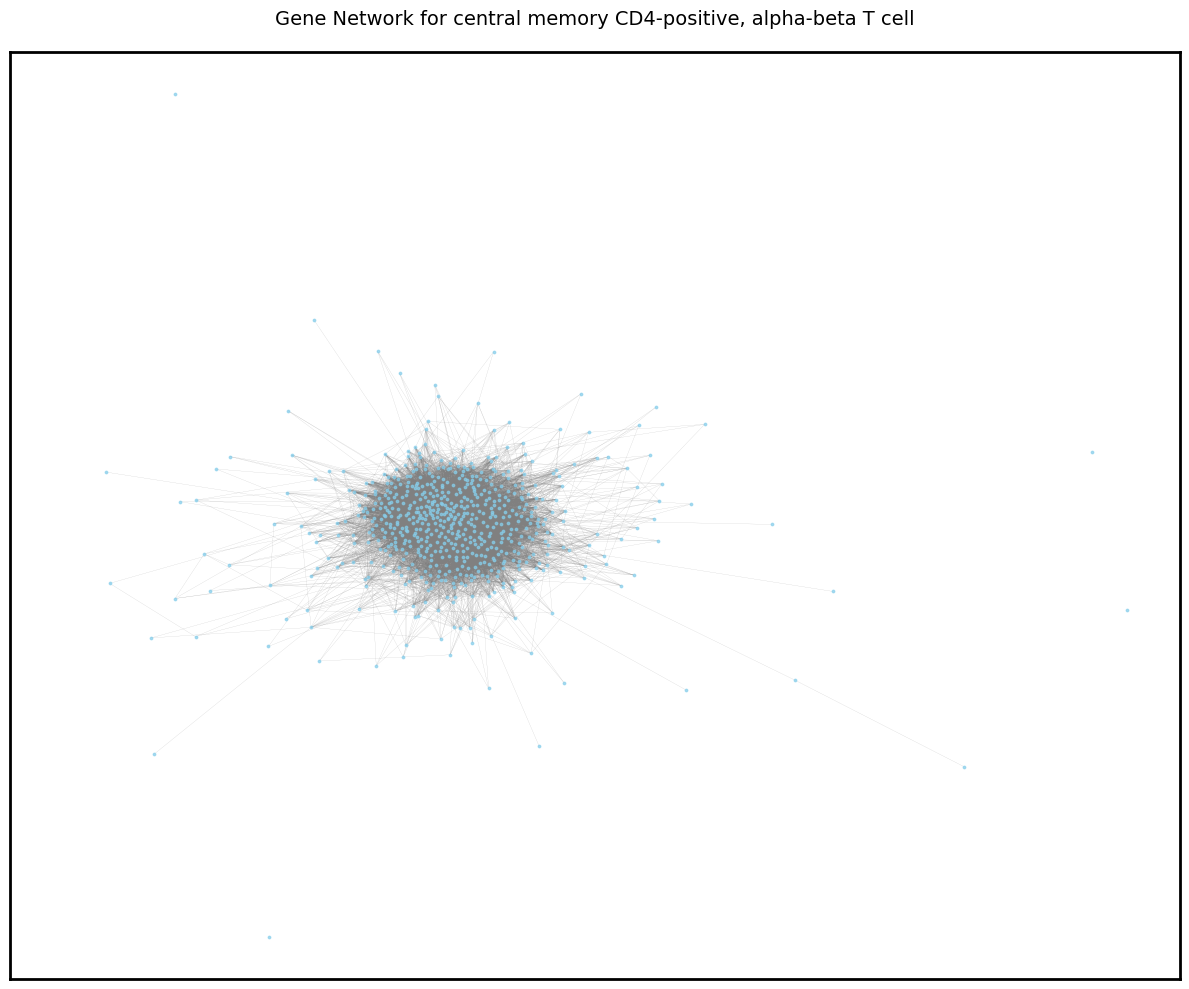


Cell Type: effector memory CD4-positive, alpha-beta T cell
Number of nodes: 581
Number of edges: 9988


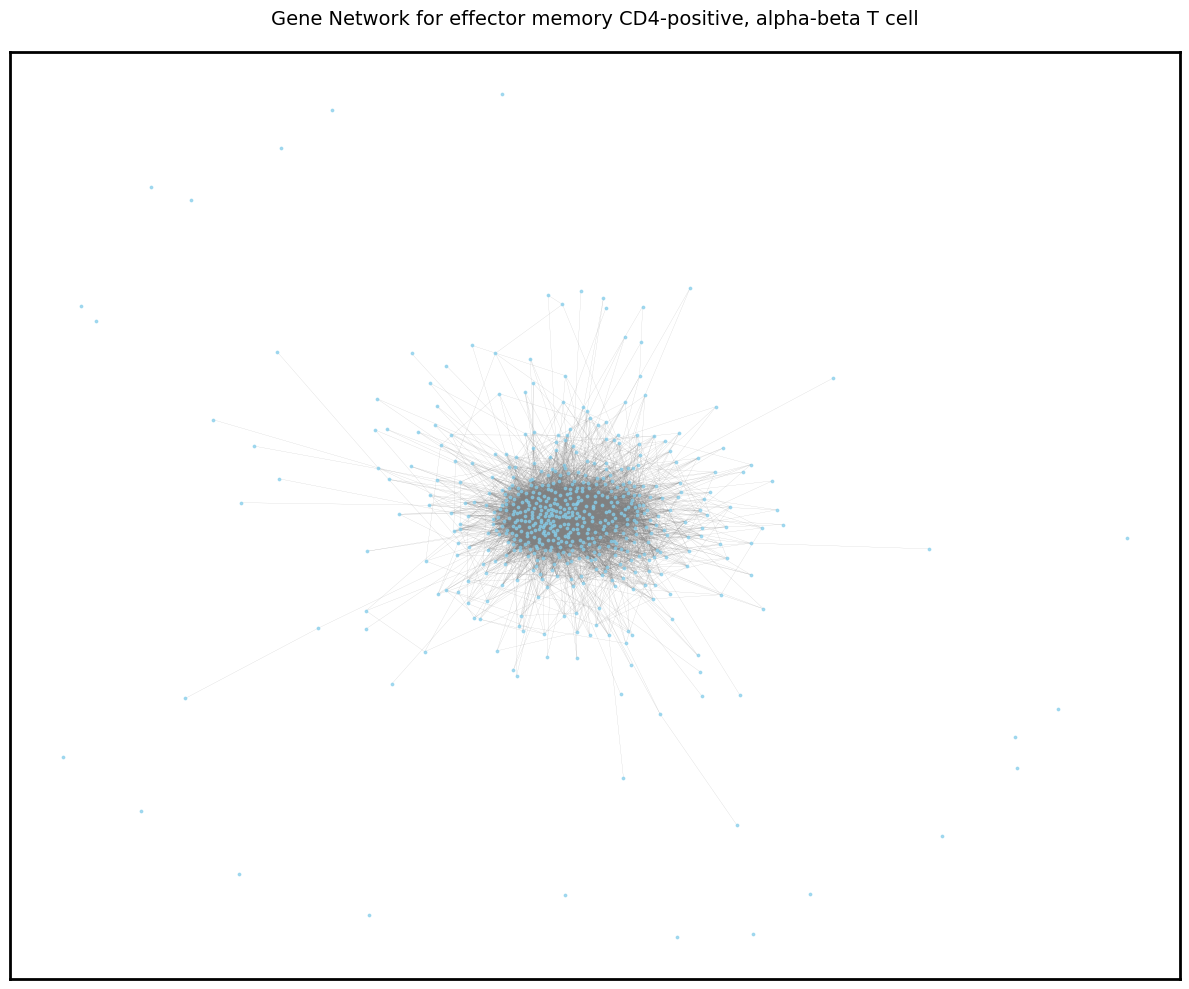


Cell Type: gamma-delta T cell
Number of nodes: 602
Number of edges: 9474


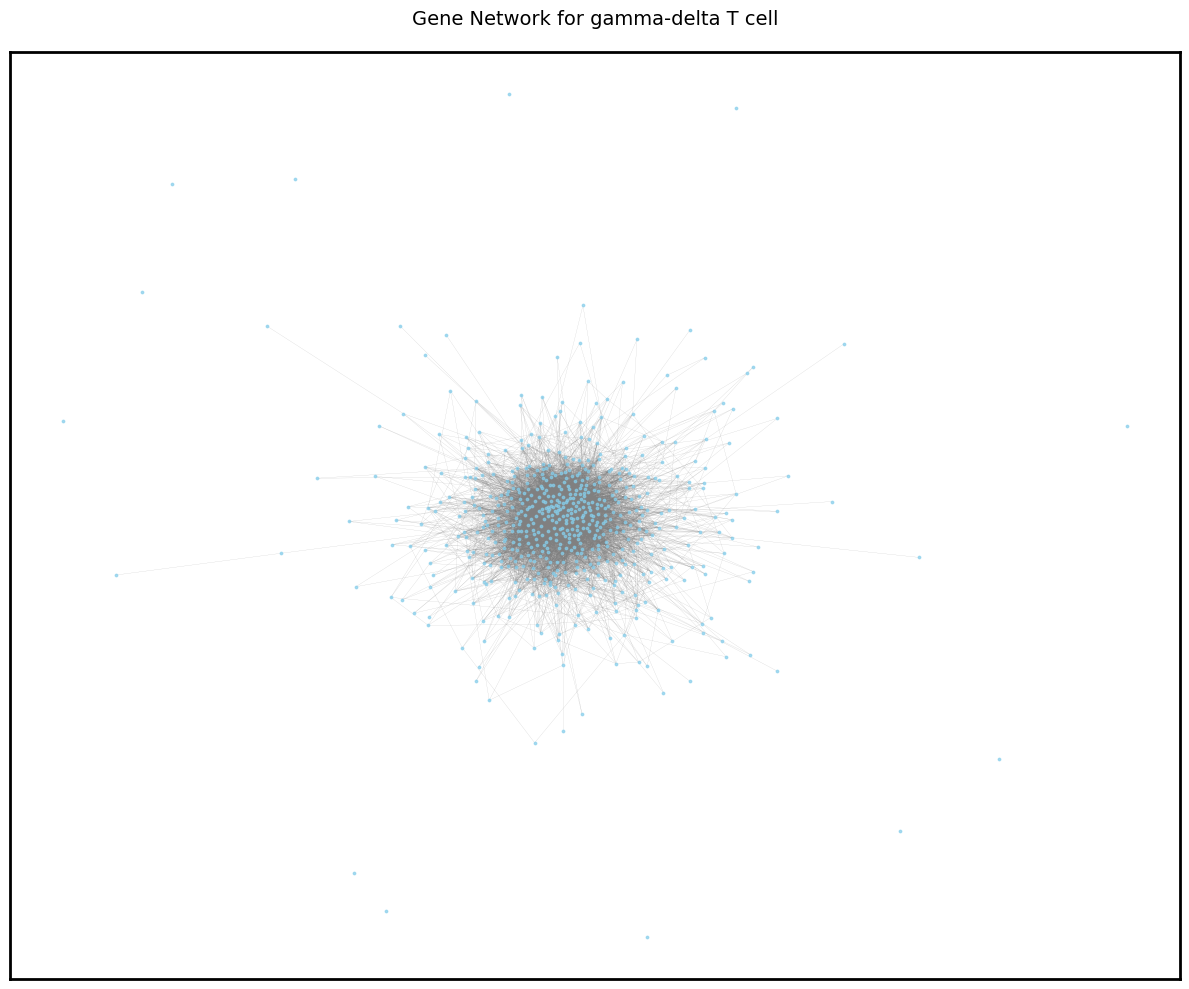


Cell Type: regulatory T cell
Number of nodes: 603
Number of edges: 6370


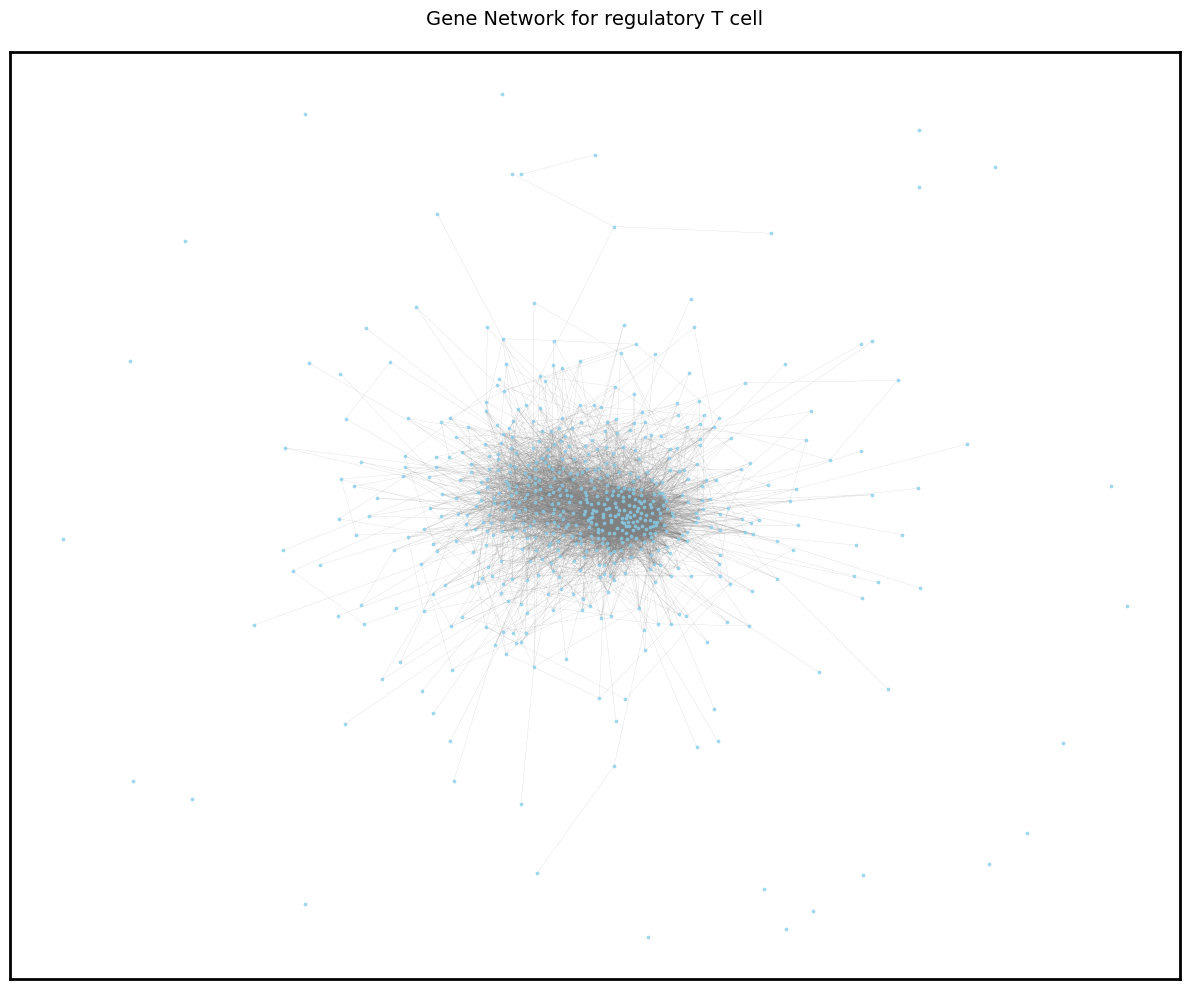

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph for each cell type
for cell_type, df in excel_files_networks.items():
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes and edges from the dataframe
    for index, row in df.iterrows():
        gene = row['Gene']
        associated_genes = row['Associated Genes']
        
        # Add the gene as a node
        G.add_node(gene)
        
        # Add edges to associated genes (if any)
        for associated_gene in associated_genes:
            G.add_edge(gene, associated_gene)
    
    # Convert to undirected for visualization
    G = G.to_undirected()
    
    # Print basic graph info
    print(f"\nCell Type: {cell_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Create visualization with black border
    plt.figure(figsize=(12, 10))
    
    # Add thick black border around the plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(2)  # Adjust thickness as needed
    
    pos = nx.spring_layout(G, k=0.15, iterations=50)
    
    nx.draw_networkx(
        G,
        pos=pos,
        with_labels=False,
        node_size=3,
        node_color="skyblue",
        width=0.1,
        edge_color="gray",
        font_size=1,
        alpha=0.7,
        ax=ax
    )
    
    plt.title(f"Gene Network for {cell_type}", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()